<a href="https://colab.research.google.com/github/mobraine/Natural-Language-Understanding/blob/main/%E2%80%9CNLTDS_Assignment_5%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies."

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**Q1: put your answer here (please keep it brief, 3-5 sentences)**

---
Answer for Q1: It is a list of 1016 concepts across 107 languages with properties such as word form and IPA. It is aimed to provide lexical data from more than twenty language families in a unified IPA encoding.
It is constructed by transcribing the prononciation of words representing different concepts into a standard IPA coding.

---

Let's read in the wordforms in this dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**Q2: put your answer here (please keep it brief, no more than 1 sentence per column)**

---
Answer for Q2:

`Language_ID` represents which language it is among the 107 languages.

`Concept_ID` represents which concept it is among the 1016 concepts.

`rawIPA` represents the IPA transcription according to a language's specific prononciation rule.

`IPA` represents a consistent and standard IPA transcription across all languages of a word.

---
Now let's read in some metadata about the languages.

In [ ]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `Family`, `iso_code`, and `subfamily` columns of the data.

**Q3: put your answer here (please keep it brief, no more than 1 sentence per column)**

---
`Family` represents which major language family the language belongs to.

`iso_code` represents the ISO 639-3 code of the language, corresponding to `Language_ID` in wordforms.


`subfamily` represents which sub language family the language belongs to.

---

Now let's read in some further data about the concepts.



In [ ]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**Q4: put your answer here (please keep it brief, no more than 1 sentence per column)**


---
`id_nelex` corresponds to the `Concept_ID` in Q2, representing which concept it is.

`gloss_en` is the word corresponding to that concept in English.

`position_in_ranking` represents the position of a concept in the rankings of all concepts' basicness scores.

---

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [ ]:
# Problem 1a: rename the approproate columns in the languages and concepts dataframes to make this merge possible.
#your code here
languages.rename(columns={"iso_code": "Language_ID", "glotto_code": "Glottocode"}, inplace=True)
concepts.rename(columns={"id_nelex": "Concept_ID"}, inplace=True)

# Problem 1b: Use the merge function to merge the three dataframes into one.
#your code here
wordforms = pd.merge(wordforms,concepts, on="Concept_ID", how="outer")
wordforms = pd.merge(wordforms,languages, on=["Language_ID","Glottocode"], how="outer")
display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments,name,family,subfamily,latitude,longitude
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN,Finnish,Uralic,Finnic,61.0000,24.450
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate,2,34,"-2,649194",ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN,Finnish,Uralic,Finnic,61.0000,24.450
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate,3,149,"-1,995463",nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN,Finnish,Uralic,Finnic,61.0000,24.450
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate,4,25,"-2,762589",mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN,Finnish,Uralic,Finnic,61.0000,24.450
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate,5,31,"-2,670705",tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN,Finnish,Uralic,Finnic,61.0000,24.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,ava,avar1256,kaufen::V,босизе,bosizje,b o s i z j e,bosizye,PUSISJE,PVSVSJV,validate,1011,139,"-2,032848",buy,купить,[BSP:Ware],[EX:goods],[НАПР:товар],BUY,1869,BUY,NaN,Avar,Nakh-Daghestanian,Daghestanian,41.7047,46.558
121609,ava,avar1256,verkaufen::V,бичизе,bit͡ʃizje,b i t͡ʃ i z j e,biCizye,PICISJE,PVKVSJV,validate,1012,140,"-2,029052",sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN,Avar,Nakh-Daghestanian,Daghestanian,41.7047,46.558
121610,ava,avar1256,bezahlen::V,кьезе,t͡ɬʼjezje,t͡ɬ ʼ j e z j e,tLyezye,TLJESJE,TRJVSJV,review,1013,198,"-1,822012",pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN,Avar,Nakh-Daghestanian,Daghestanian,41.7047,46.558
121611,ava,avar1256,zahlen::V,кьезе,t͡ɬʼjezje,t͡ɬ ʼ j e z j e,tLyezye,TLJESJE,TRJVSJV,validate,1014,235,"-1,715766",pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN,Avar,Nakh-Daghestanian,Daghestanian,41.7047,46.558


In [ ]:
i = wordforms[wordforms["Word_Form"]=='卖']
print(i)

       Language_ID Glottocode    Concept_ID  ... subfamily latitude longitude
119171         cmn   mand1415  verkaufen::V  ...   Sinitic  40.0209   116.228

[1 rows x 27 columns]


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [ ]:
!pip install lingpy

In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [ ]:
#Problem 2a: Filter our the non-Indo-European languages from the wordforms and languages dataframes
#your code here

wordforms = wordforms[wordforms["family"]=="Indo-European"]
languages = languages[languages["family"]=="Indo-European"]

#Problem 2b: Filter our the concepts which appear less than or equal to rank 20 in the concepts dataframe.
max_rank=20
# your code here
concepts = concepts[concepts["position_in_ranking"] < max_rank]

In [ ]:
display(languages)

,name,Glottocode,Language_ID,family,subfamily,latitude,longitude
26,Bengali,beng1280,ben,Indo-European,Indo-Aryan,24.000000,90.000000
27,Hindi,hind1269,hin,Indo-European,Indo-Aryan,27.200000,78.000000
28,Northern Pashto,nort2646,pbu,Indo-European,Iranian,32.100000,67.200000
29,Western Farsi,west2369,pes,Indo-European,Iranian,28.659300,55.158600
30,Northern Kurdish,nort2641,kmr,Indo-European,Iranian,37.000000,43.000000
31,Ossetian,osse1243,oss,Indo-European,Iranian,43.180000,44.230000
32,Armenian,nucl1235,hye,Indo-European,Armenic,40.000000,45.000000
33,Modern Greek,mode1248,ell,Indo-European,Graeco-Phrygian,38.000000,23.750000
34,Standard Albanian,alba1267,sqi,Indo-European,Albanian,41.330000,19.850000
35,Bulgarian,bulg1262,bul,Indo-European,Balto-Slavic,42.700000,23.800000


In [ ]:
display(concepts)

,number,position_in_ranking,ranking_value,Concept_ID,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
62,63,19,"-2,92383",Wasser::N,water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
449,450,12,"-3,008012",Tag::N,day,день,[],[],[],DAY_(NOT_NIGHT),1225,DAY_(NOT_NIGHT),NaN
605,606,17,"-2,945985",hier::ADV,here,здесь,[],[],[],HERE,136,HERE,NaN
608,609,15,"-2,964168",dort::ADV,there,там,[],[],[],THERE,1937,THERE,NaN
619,620,6,"-3,262623",nicht::ADV,not,не,[],[],[],NOT,1240,NOT,NaN
637,638,3,"-3,471809",das::PRN,that,то,[],[],[],THAT,78,THAT,NaN
639,640,5,"-3,345092",ich::PRN,I,я,[],[],[],I,1209,I,NaN
640,641,4,"-3,349547",du::PRN,thou,ты,[],[],[],THOU,1215,THOU,NaN
641,642,8,"-3,216746",er::PRN,he,он,[],[],[],HE_OR_SHE_OR_IT,262,HE_OR_SHE_OR_IT,NaN
642,643,10,"-3,038912",wir::PRN,we,мы,[],[],[],WE,1212,WE,NaN


In [ ]:
display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments,name,family,subfamily,latitude,longitude
30365,ben,beng1280,Auge::N,চক্ষু,t͡ʃɔkkʰu,t͡ʃ ɔ k kʰ u,Coku,CUKKY,KVKKV,validate,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN,Bengali,Indo-European,Indo-Aryan,24.0000,90.0000
30366,ben,beng1280,Ohr::N,কর্ণ,kɔrno,k ɔ r n o,korno,KURNU,KVRNV,validate,2,34,"-2,649194",ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN,Bengali,Indo-European,Indo-Aryan,24.0000,90.0000
30367,ben,beng1280,Nase::N,নাক,nak,n a k,nak,NAK,NVK,validate,3,149,"-1,995463",nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN,Bengali,Indo-European,Indo-Aryan,24.0000,90.0000
30368,ben,beng1280,Mund::N,মুখ,mukʰ,m u kʰ,muk,MYK,MVK,validate,4,25,"-2,762589",mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN,Bengali,Indo-European,Indo-Aryan,24.0000,90.0000
30369,ben,beng1280,Zahn::N,দাঁত,d̪ãt̪ɔ,d ã t ɔ,dato,TATU,TVTV,validate,5,31,"-2,670705",tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN,Bengali,Indo-European,Indo-Aryan,24.0000,90.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73612,ron,roma1327,bezahlen::V,achita,akita,a k i t a,akita,AKITA,VKVTV,validate,1013,198,"-1,822012",pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN,Romanian,Indo-European,Italic,46.3913,24.2256
73613,ron,roma1327,zahlen::V,plăti,plətʲ,p l ə tʲ,pl3t,PLET,PRVT,validate,1014,235,"-1,715766",pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN,Romanian,Indo-European,Italic,46.3913,24.2256
73614,ron,roma1327,beherrschen::V,stăpâni,stəpɨnʲ,s t ə p ɨ nʲ,st3p3n,STEPIN,STVPVN,validate,1015,899,"0,118183",rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN,Romanian,Indo-European,Italic,46.3913,24.2256
73615,ron,roma1327,ertragen::V,răbda,rəbda,r ə b d a,r3bda,REPTA,RVPTV,validate,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN,Romanian,Indo-European,Italic,46.3913,24.2256


Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we we will compute the normalized levenshtein distance between the words for Auge::N (eye in English) for German and English and then similarily for all 19 other concepts. We will then average these values to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [ ]:
import lingpy as lp
import numpy as np

#initialize confusion matrix
confusion= [[0 for j in range(len(languages))] for i in range(len(languages))]


#Problem 3: fill the confusion matrix  using the
#lp.align.pairwise.edit_dist function from lingpy, on
#the "IPA" fields for each language.
for language1 in range(len(languages["name"])):
  for language2 in range(len(languages["name"])):

    distances=[]
    for concept in concepts["Concept_ID"]:
      IPA1 = wordforms[(wordforms['name']==languages['name'].tolist()[language1])&(wordforms['Concept_ID']==concept)]['IPA'].tolist()[0]
      IPA2 = wordforms[(wordforms['name']==languages['name'].tolist()[language2])&(wordforms['Concept_ID']==concept)]['IPA'].tolist()[0]
      # display(IPA1)
      # display(IPA2)
      distance = lp.align.pairwise.edit_dist(IPA1,IPA2,normalized = True)
      distances.append(distance)

    confusion[language1][language2]=np.mean(distances)


Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages.


In [ ]:
language_names=list(languages["name"].values)
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_names)

{0: ['Bengali', 'Hindi'],
 2: ['Northern Pashto', 'Ossetian'],
 3: ['Western Farsi', 'Northern Kurdish'],
 6: ['Armenian'],
 7: ['Modern Greek'],
 8: ['Standard Albanian'],
 9: ['Bulgarian',
  'Croatian',
  'Slovene',
  'Slovak',
  'Polish',
  'Czech',
  'Belarusian',
  'Russian',
  'Ukrainian',
  'Lithuanian',
  'Latvian'],
 20: ['Icelandic',
  'Norwegian (Bokmål)',
  'Swedish',
  'Danish',
  'German',
  'Dutch',
  'English'],
 27: ['Irish'],
 28: ['Welsh'],
 29: ['Breton'],
 30: ['Latin'],
 31: ['French'],
 32: ['Catalan', 'Spanish', 'Italian', 'Portuguese', 'Romanian']}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy erros in this clustering?

**Q5: put your answer here (please keep it brief, no more than 4-5 sentences.)**

---
Answer for Q5:

Except the following:

1. Irish, Welsh and Breton should be clustered into Celtic
2. French, Latin should be clustered into ['Catalan', 'Spanish', 'Italian', 'Portuguese', 'Romanian'] which is Italic
3. ['Northern Pashto', 'Ossetian'] and ['Western Farsi', 'Northern Kurdish'] should be clustered together into Iranian.

Others are correctly clustered.

---


Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


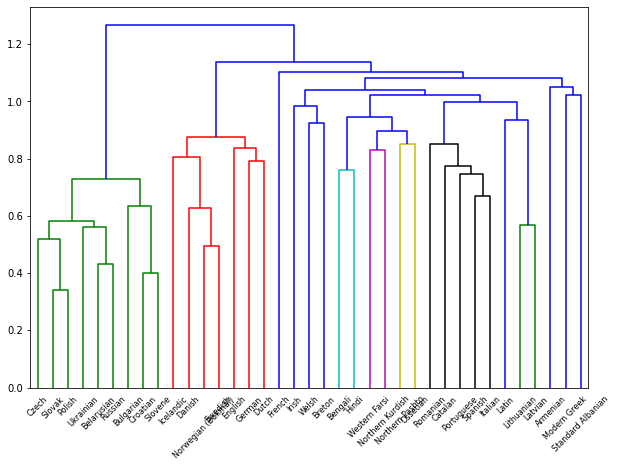

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

#Problem 4: use the linkage function with the average linkage method to compute the clustering.
linked = linkage(confusion, 'average')


#plot the results using dendrogram
def llf(id): return list(languages["name"].values)[id]
plt.figure(figsize=(10, 7))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy erros in this clustering?

**Q6: put your answer here (please keep it brief, no more than 4-5 sentences.)**

---
Answer for Q6:

Since I am using the same method for calculating distance as in flat_cluster, which is 'upgma' (here is 'average', but the two are the same), the clustering has the same structure as flat_cluster.

---

***Question 7:*** Try three of the other linkage methods and describe how the change the results.

**Q7: put your answer here (please keep it brief, no more than 4-5 sentences.)**

---
Answer for Q7:

'single'/Nearest Point Algorithm: There both less clusters and much smaller clusters as many languages don't form a cluster with other languages, compared to using 'average'.

'complete’/Farthest Point Algorithm: There less clusters but bigger clusters,  compared to using 'average'.


’weighted’/WPGMA: Very similar to using 'average', but some clusters have different compositions.

---

***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**Q8: put your answer here (please keep it brief, no more than 3-4 sentences.)**

---

There is no great changes, but some languages moved from its original clusters to other wrong clusters, while some languages that didn't belong to any clusters before are clustered together now.